##### Python [conda env:DataScience]
<hr style="color:#FFA500; width:100%">

<div style="padding:10px; padding-left:15px; color:white; margin:0px; text-align:center; display:fill; border-radius:5px; background-color:#0000cd; overflow:hidden;">
    <h1 style="font-weight:bold;">
        Model Development: Automovile v.11
    </h1>
</div>

<h2 style="color:#ffa500;">UCI Machine Learning Repository: <a href="https://archive.ics.uci.edu/dataset/10/automobile">Automovile</a></h2>

- #### Dataset with data for this instance:
- Data folder: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
- Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

Sources:

1) 1985 Imported Car and Truck Specifications, Ward's 1985 Automotive Yearbook.
2) Personal Automobile Manuals, Insurance Services Bureau, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Dataset Information:

This dataset consists of three types of entities: (a) a car's specification in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use compared to other cars. The second rating corresponds to the degree to which the car is riskier than its price indicates. Cars are initially assigned a risk factor symbol associated with their price. Then, if it is riskier (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process "symbolization." A value of +3 indicates that the car is risky, -3 that it is probably quite safe.

The third factor is the relative average loss payment per insured vehicle per year. This value is normalized to all cars within a particular size classification (small two-door, station wagon, sport/special, etc.) and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romeo, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

- #### Necessary packages and libraries:

In [1]:
# Basic Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats
import warnings
import re
import wget

# Jupyter Lab config
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Feature Selection and Dimensionality Reduction
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Models and Assessment Tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Seaborn config
sns.set_style('dark')
#sns.set(font_scale=1.2)

# Disable warnings
warnings.filterwarnings('ignore')

# Pandas config
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# Numpy config
np.random.seed(0)  # Ensure reproducibility
np.set_printoptions(suppress=True)

print('All packages imported!')

All packages imported!


- #### Import the file with the column names: imports-85.names from the Host

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

--2024-08-11 19:57:36--  http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado
Guardando como: ‘imports-85.names.3’

imports-85.names.3      [ <=>                ]   4,64K  --.-KB/s    en 0,01s   

2024-08-11 19:57:37 (437 KB/s) - ‘imports-85.names.3’ guardado [4747]



- #### Import the data file: imports-85.data from the Host

In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

--2024-08-11 19:57:37--  http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado
Guardando como: ‘imports-85.data.3’

imports-85.data.3       [  <=>               ]  25,33K  41,2KB/s    en 0,6s    

2024-08-11 19:57:39 (41,2 KB/s) - ‘imports-85.data.3’ guardado [25936]



- #### Extract the column names from the name file

In [4]:
# Read the names file
with open('imports-85.names', 'r') as file:
    lines = file.readlines()

# Extract the lines containing the column names (lines 59 to 86)
names_lines = lines[59:86]  # Indexes in Python are 0-based, so 59 is line 60

# Process the lines to extract and clean the column names
column_names = [
    re.sub(r'^\d+\.\s*', '', line.split(':')[0].strip())
    for line in names_lines
    if ':' in line
]

# Print the column names to verify
print(column_names)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


- #### Read the data from the data file

In [5]:
df = pd.read_csv('imports-85.data', names=column_names, na_values='?')

- #### Delete the rows that do not have a price in the 'price' column, since it is the target variable

In [6]:
df = df.dropna(subset=['price'])

In [7]:
df.to_csv('automovile.csv', index=False)

- #### Importing CSV file to Python

In [8]:
data = 'automovile.csv'
df = pd.read_csv(data)
df.head()

symboling  normalized-losses         make fuel-type aspiration num-of-doors   body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price
0          3                NaN  alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47    2.68                9.0       111.0    5000.0        21           27  13495.0
1          3                NaN  alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47    2.68                9.0       111.0    5000.0        21           27  16500.0
2          1                NaN  alfa-romero       gas        std          two    hatchback          rwd           front        94.5   171.2   65.5    52.4         2823        ohcv              six          152        mpfi  2.68    3.47                9.0       154.0    5000.0        19           26  16500.0
3          2              164.0         audi       gas        std         four        sedan          fwd           front        99.8   176.6   66.2    54.3         2337         ohc             four          109        mpfi  3.19    3.40               10.0       102.0    5500.0        24           30  13950.0
4          2              164.0         audi       gas        std         four        sedan          4wd           front        99.4   176.6   66.4    54.3         2824         ohc             five          136        mpfi  3.19    3.40                8.0       115.0    5500.0        18           22  17450.0

In [9]:
df.shape

(201, 26)

In [10]:
df.describe()

symboling  normalized-losses  wheel-base      length       width      height  curb-weight  engine-size        bore      stroke  compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg         price
count  201.000000         164.000000  201.000000  201.000000  201.000000  201.000000   201.000000   201.000000  197.000000  197.000000         201.000000  199.000000   199.000000  201.000000   201.000000    201.000000
mean     0.840796         122.000000   98.797015  174.200995   65.889055   53.766667  2555.666667   126.875622    3.330711    3.256904          10.164279  103.396985  5117.587940   25.179104    30.686567  13207.129353
std      1.254802          35.442168    6.066366   12.322175    2.101471    2.447822   517.296727    41.546834    0.270793    0.319256           4.004965   37.553843   480.521824    6.423220     6.815150   7947.066342
min     -2.000000          65.000000   86.600000  141.100000   60.300000   47.800000  1488.000000    61.000000    2.540000    2.070000           7.000000   48.000000  4150.000000   13.000000    16.000000   5118.000000
25%      0.000000          94.000000   94.500000  166.800000   64.100000   52.000000  2169.000000    98.000000    3.150000    3.110000           8.600000   70.000000  4800.000000   19.000000    25.000000   7775.000000
50%      1.000000         115.000000   97.000000  173.200000   65.500000   54.100000  2414.000000   120.000000    3.310000    3.290000           9.000000   95.000000  5200.000000   24.000000    30.000000  10295.000000
75%      2.000000         150.000000  102.400000  183.500000   66.600000   55.500000  2926.000000   141.000000    3.590000    3.410000           9.400000  116.000000  5500.000000   30.000000    34.000000  16500.000000
max      3.000000         256.000000  120.900000  208.100000   72.000000   59.800000  4066.000000   326.000000    3.940000    4.170000          23.000000  262.000000  6600.000000   49.000000    54.000000  45400.000000

<h1 style="color:#ffa500; font-weight: bold;">Data Preprocessing:</h1>

- I identify and handle missing values ​​using imputation.
- I convert categorical data into numerical data using One-Hot Encoding.
- I standardize numerical data to have a uniform scale.

- #### Search for null values ​​in predictor variables

In [11]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])

normalized-losses    37
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64


- #### Fill missing numerical values ​​with the mean

In [12]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

- #### Fill categorical missing values ​​with mode

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

- #### Checkup

In [14]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])

Series([], dtype: int64)


<h1 style="color:#ffa500; font-weight: bold;">Exploratory Data Analysis (EDA):</h1>

- Univariate Analysis
    - Distributions of Numerical Features
    - Distributions of Categorical Features
- Bivariate Analysis
    - Relationship between Numerical Features
    - Relationship between Categorical Features and the Objective
- Multivariate Analysis
    - Relationship between Multiple Features

- #### Univariate Analysis
    - Distributions of Numerical Features:

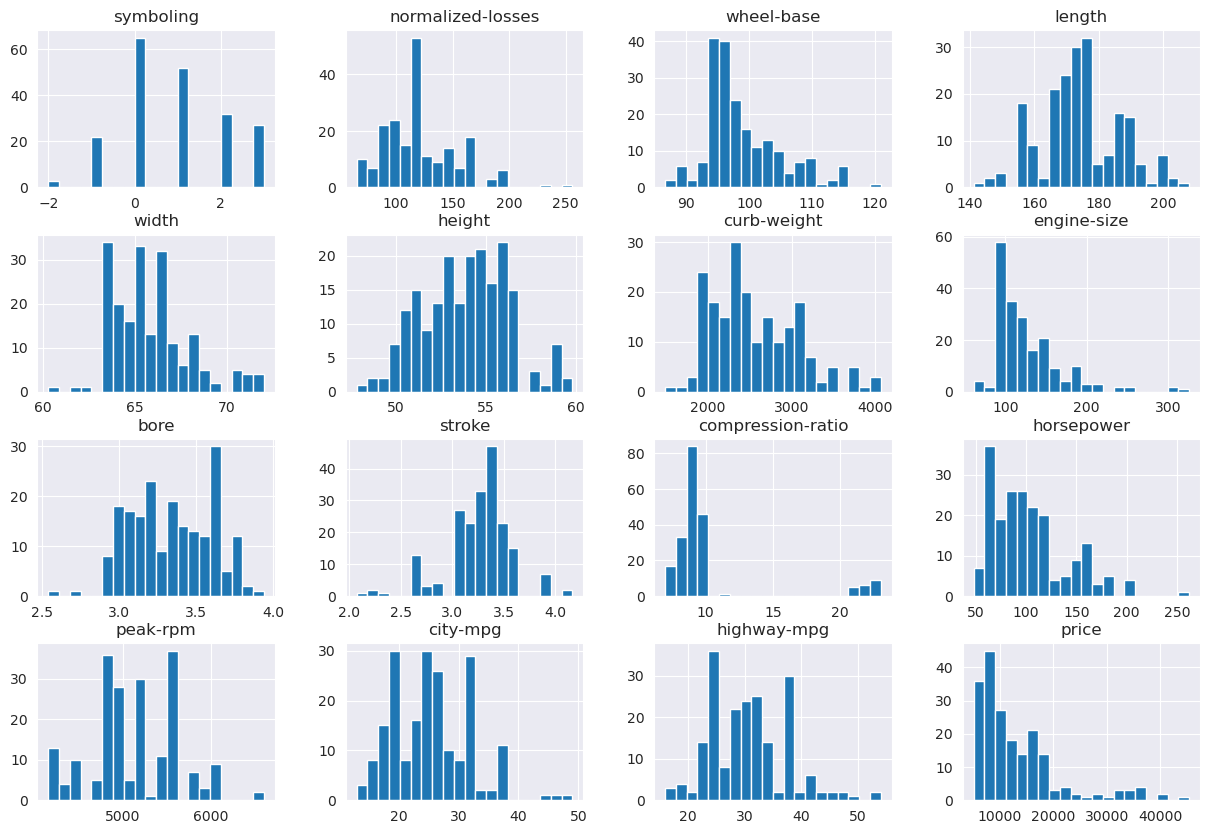

In [15]:
# Histogramas
df.hist(bins=20, figsize=(15, 10))
plt.show()

- Categorical Feature Distributions:

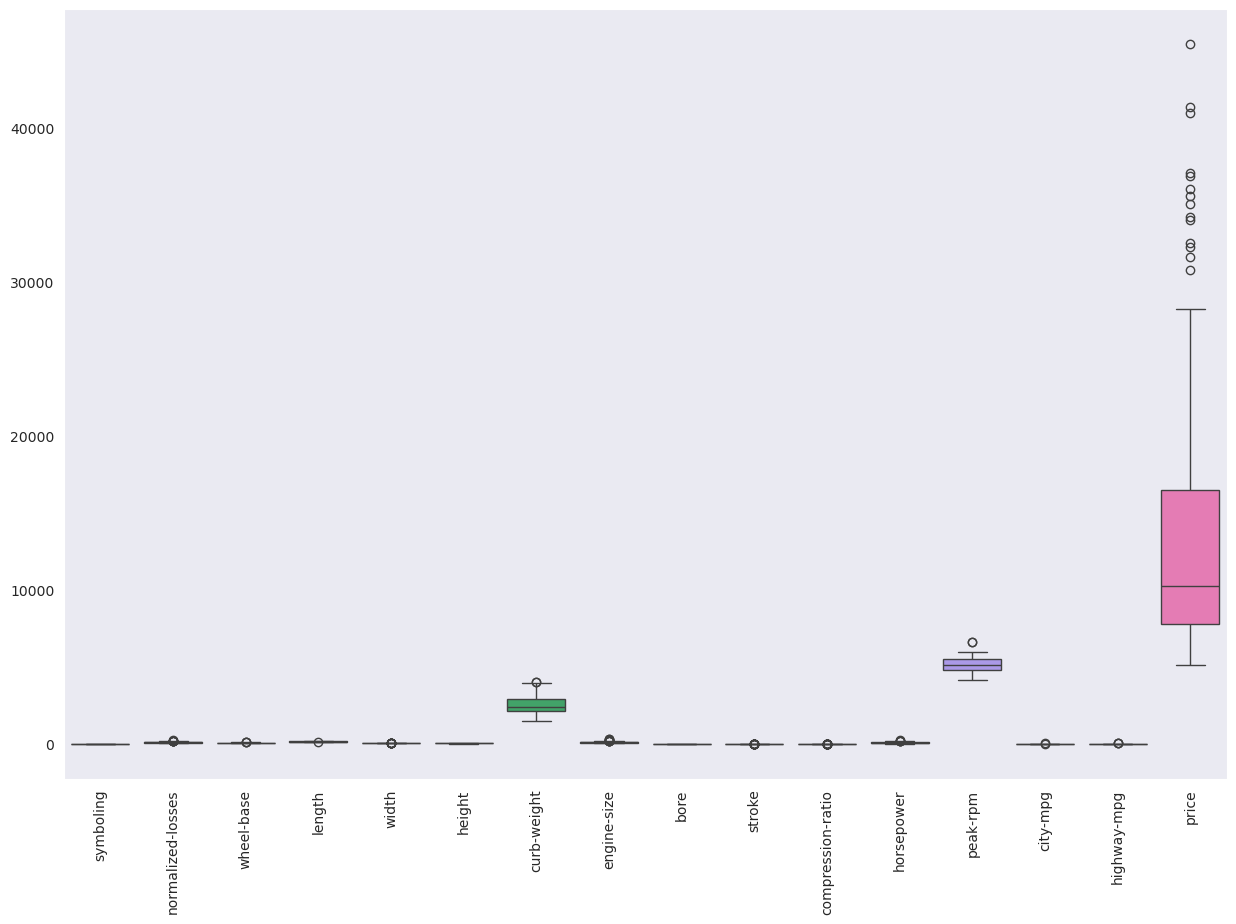

In [16]:
# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

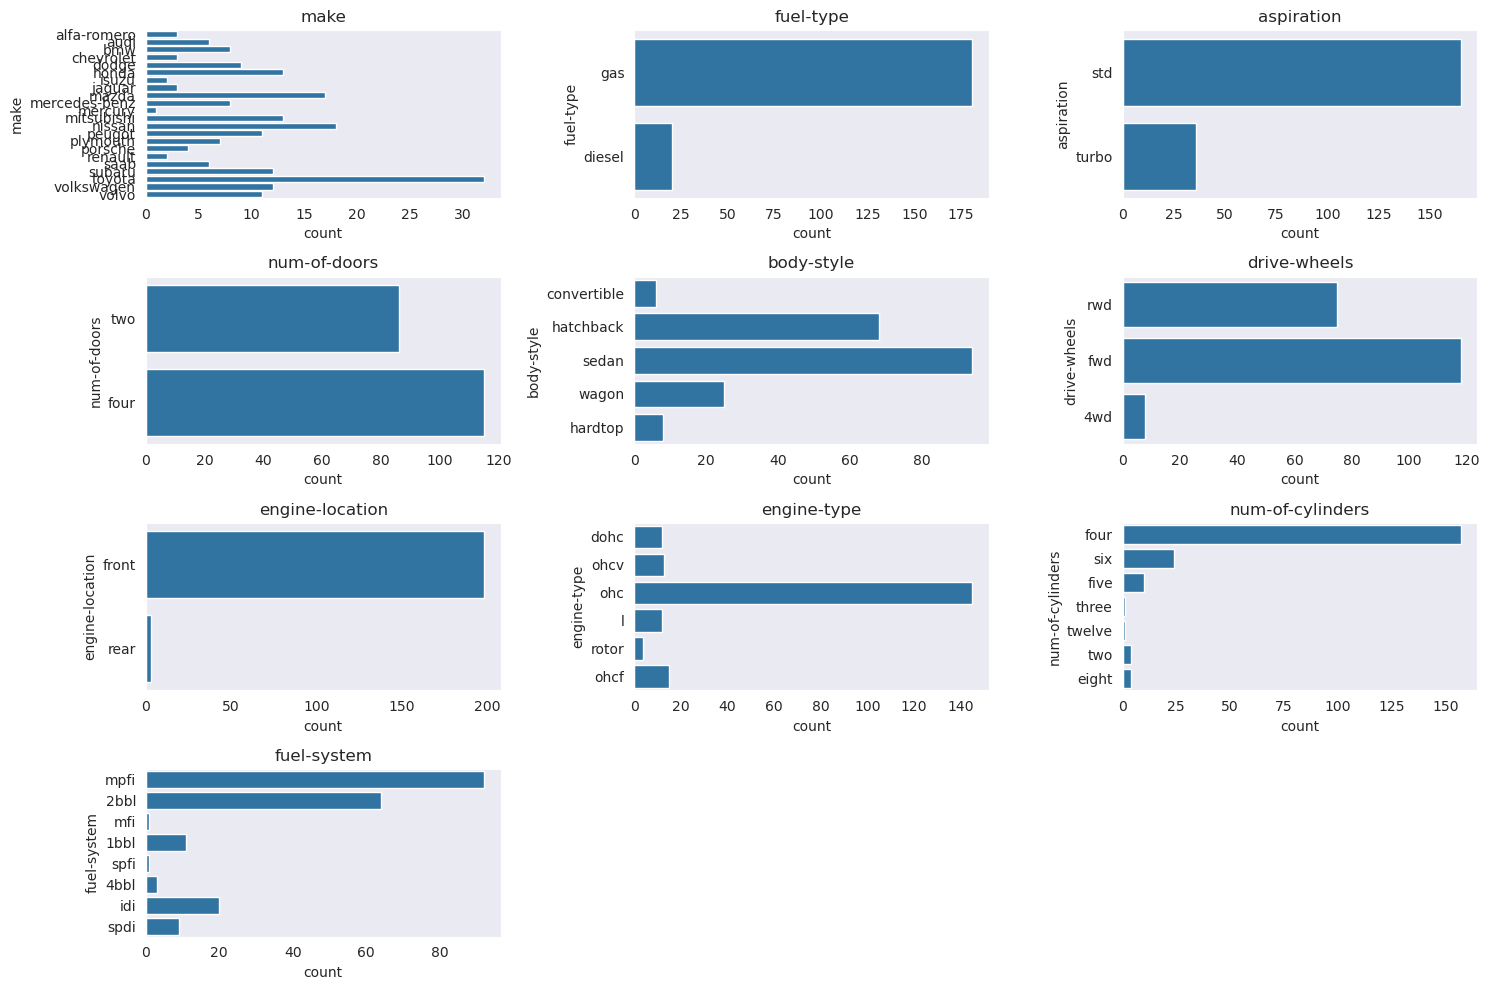

In [17]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

- #### Bivariate Analysis
    - Relationship between Numerical Features:

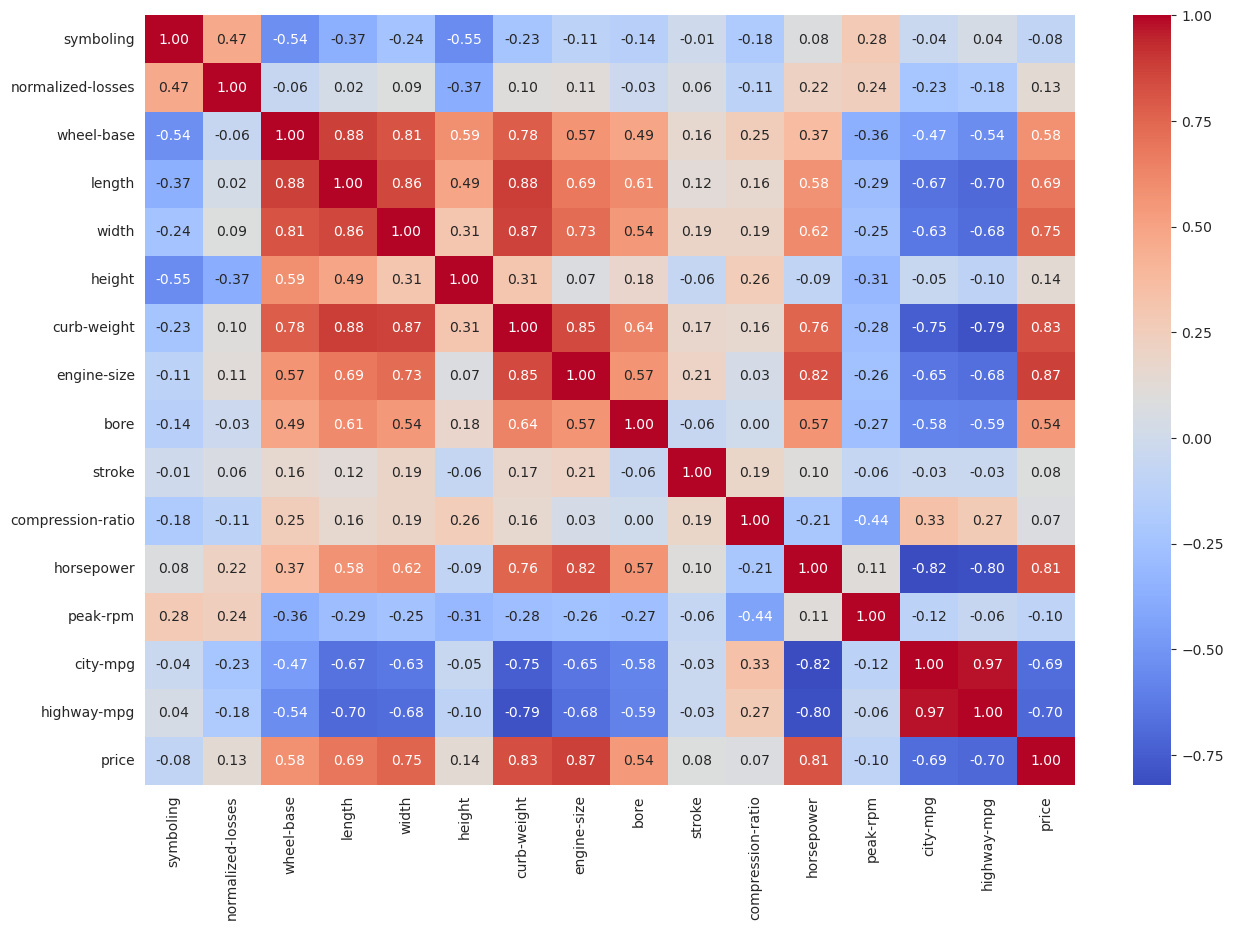

In [18]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

<Figure size 2000x1500 with 0 Axes>

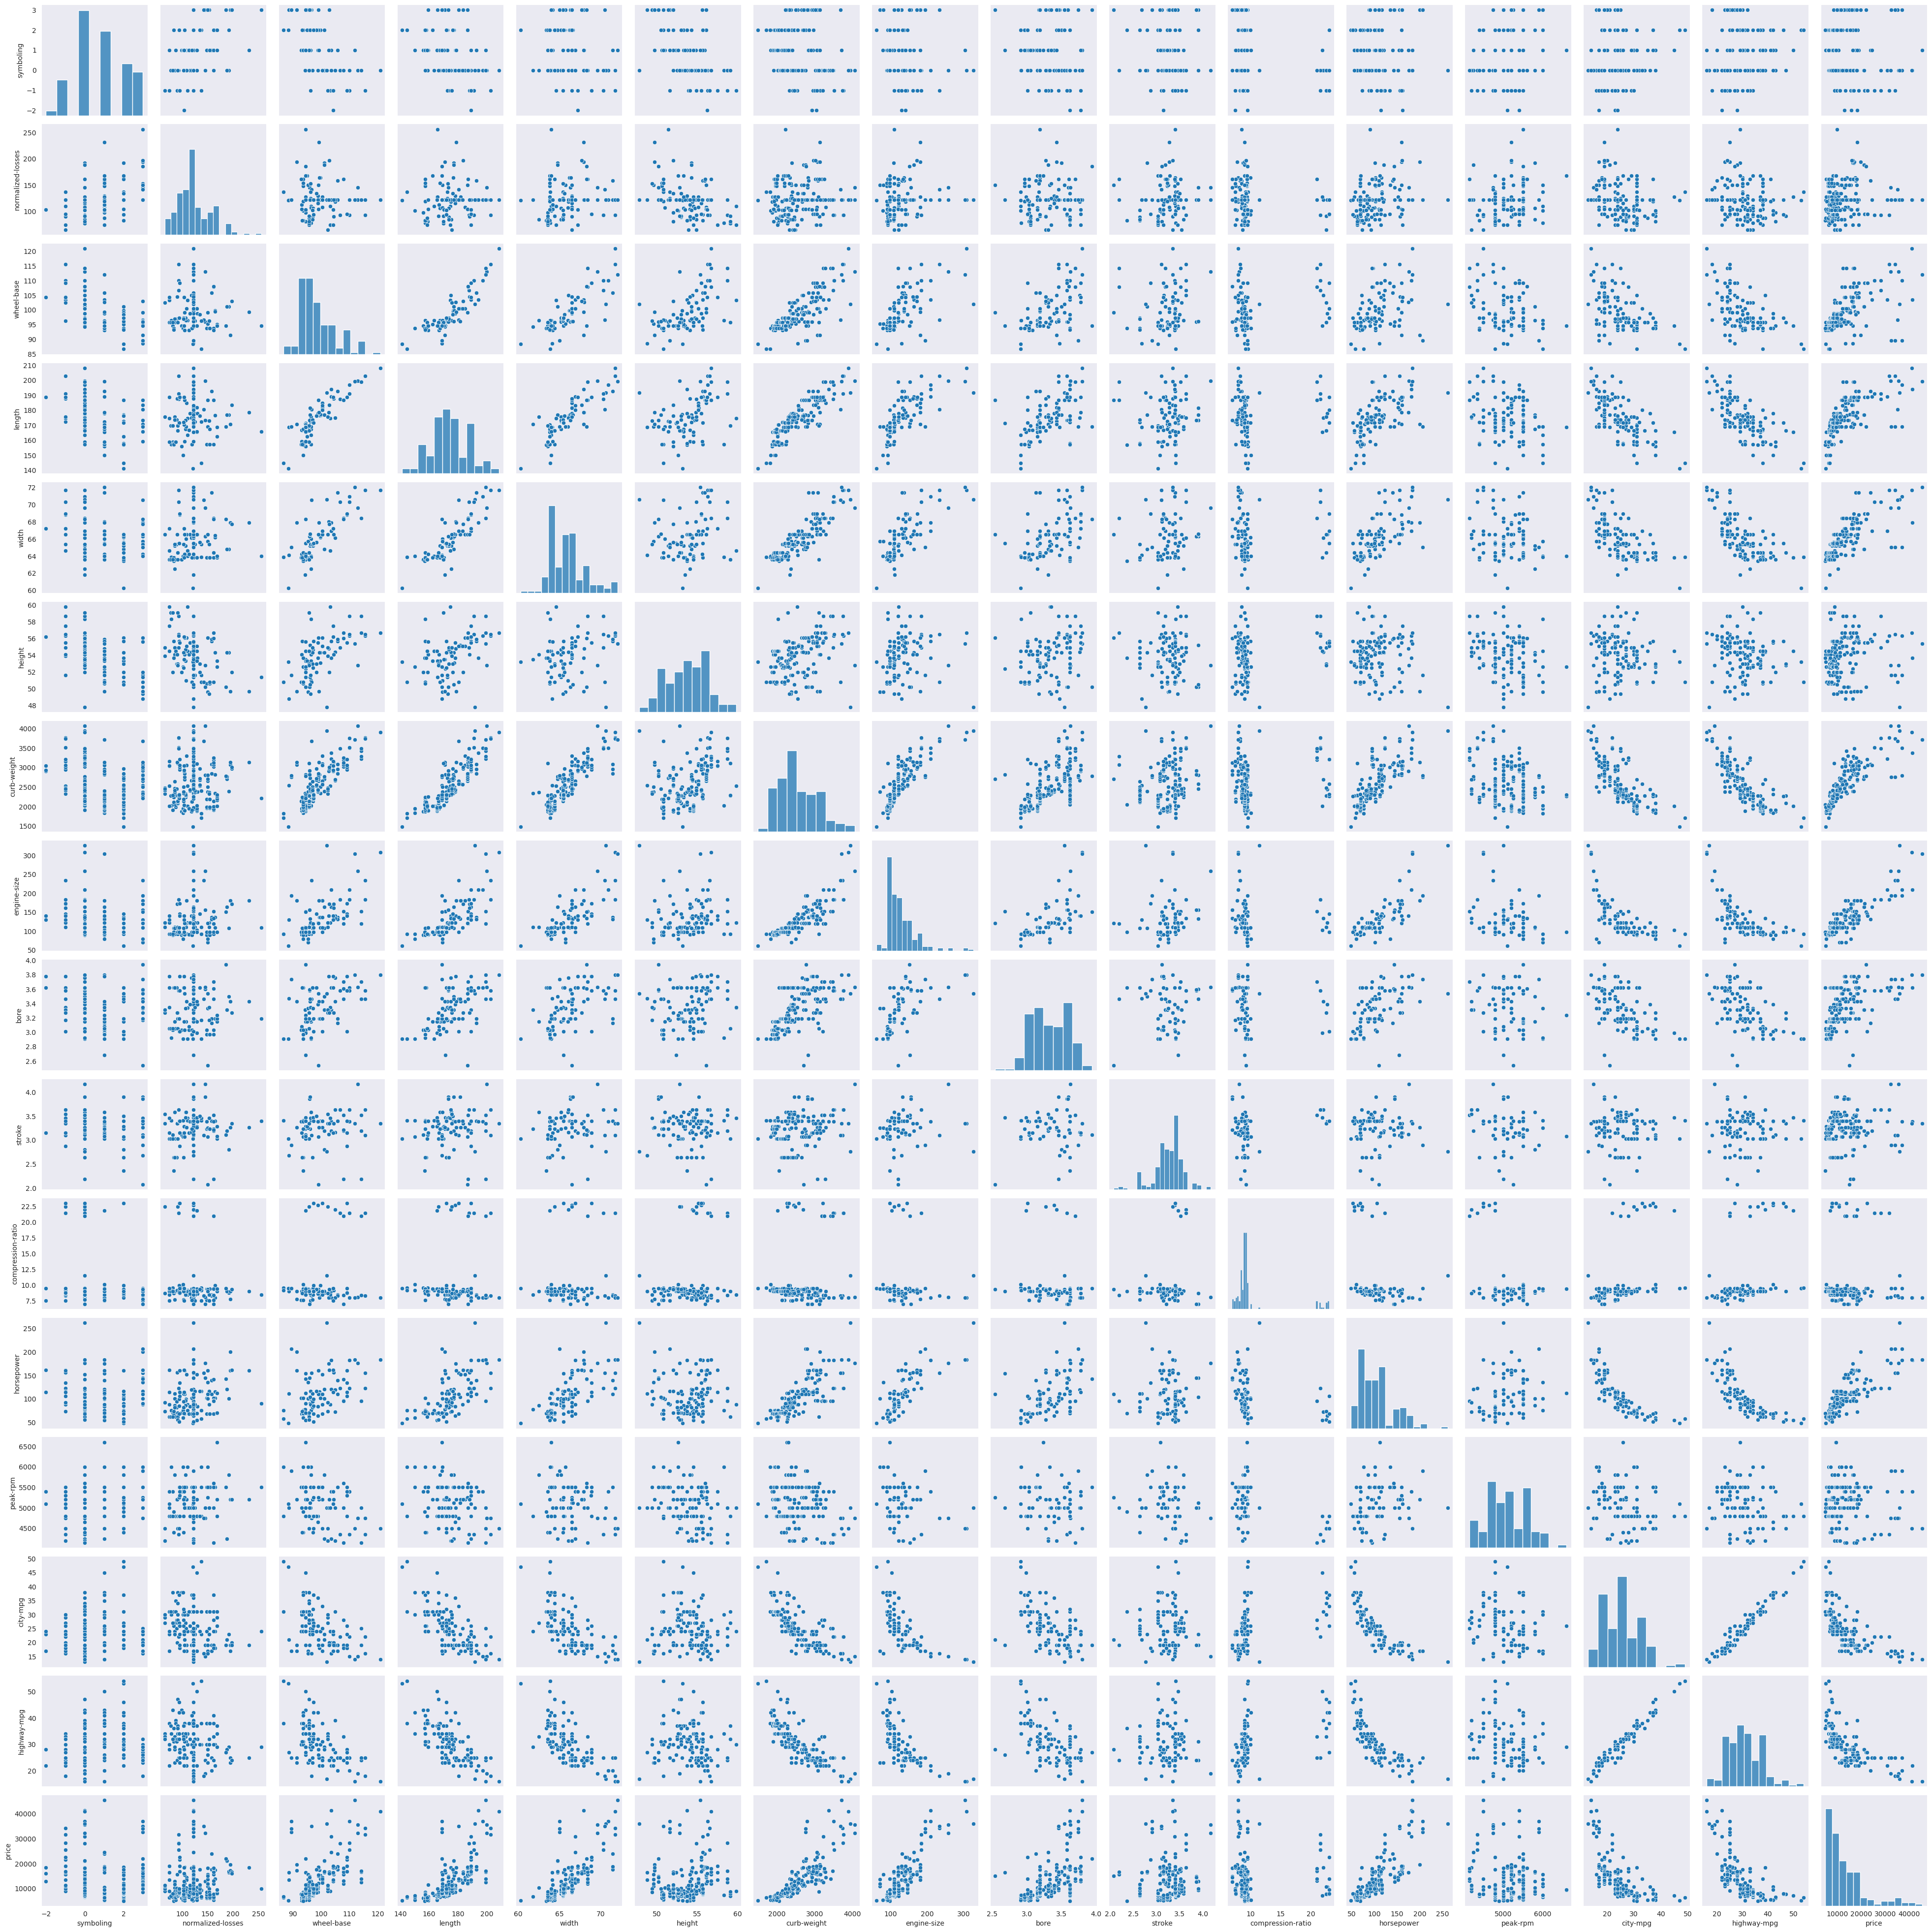

In [19]:
# Dispersion plot
plt.figure(figsize=(20, 15))
sns.pairplot(df[numerical_cols])
plt.show()

- Relación entre Características Categóricas y el Objetivo:

In [20]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'], dtype='object')

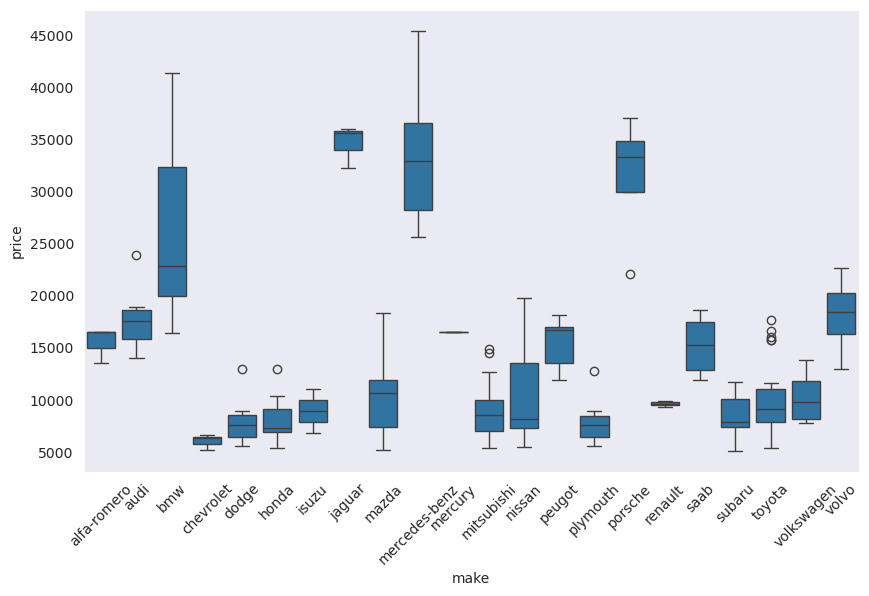

In [21]:
# Relación entre 'make' y 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

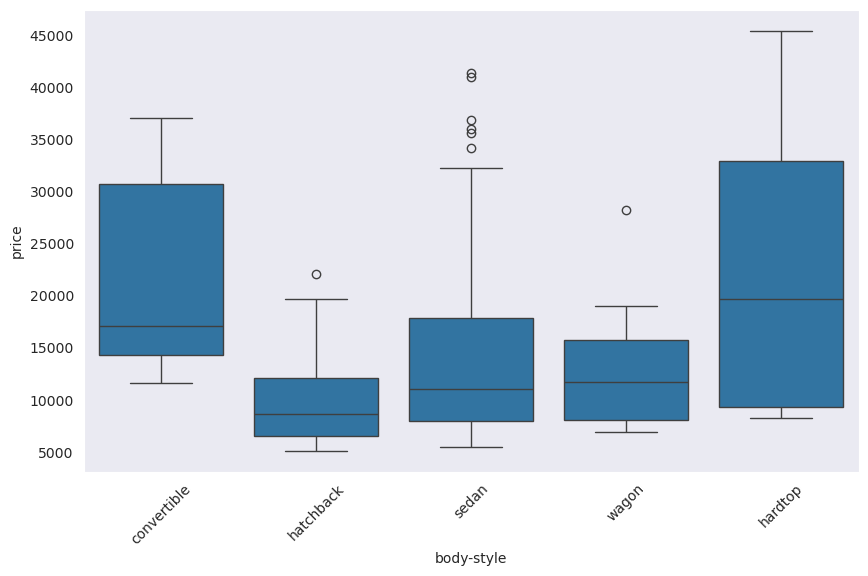

In [22]:
# Relación entre 'body-style' y 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='body-style', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

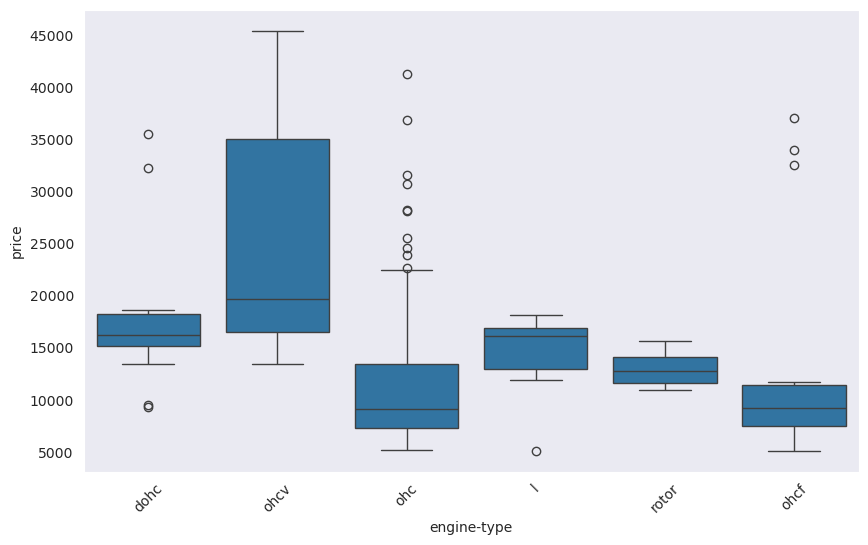

In [23]:
# 'engine-type' and 'price' relation
plt.figure(figsize=(10, 6))
sns.boxplot(x='engine-type', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

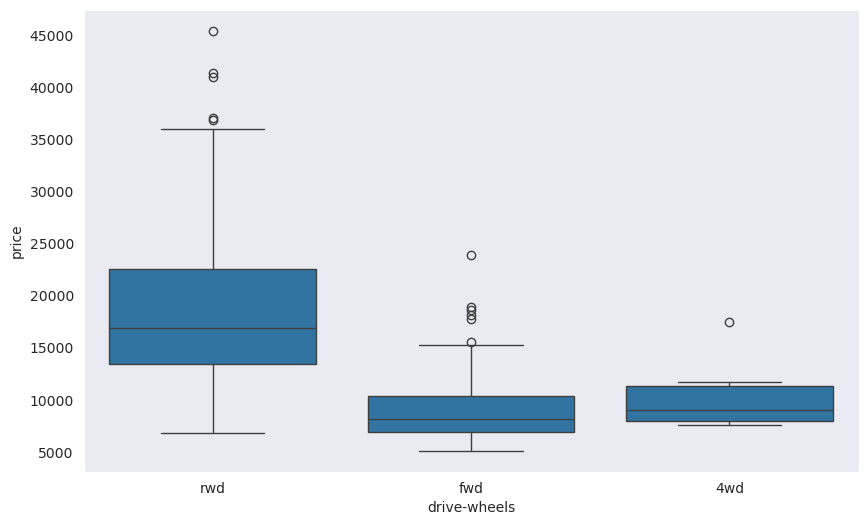

In [24]:
# Relación entre 'drive-wheels' y 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.show()

- #### Multivariate Analysis
    - Relationship between Multiple Characteristics:

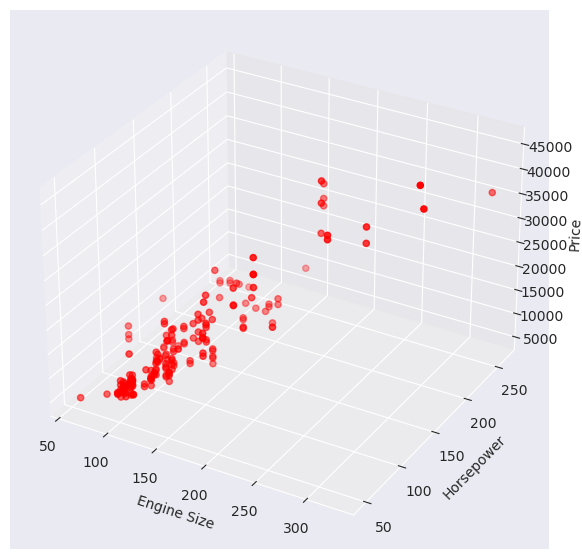

In [25]:
# 3D Dispersion plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['engine-size'], df['horsepower'], df['price'], c='r', marker='o')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Price')

plt.show()

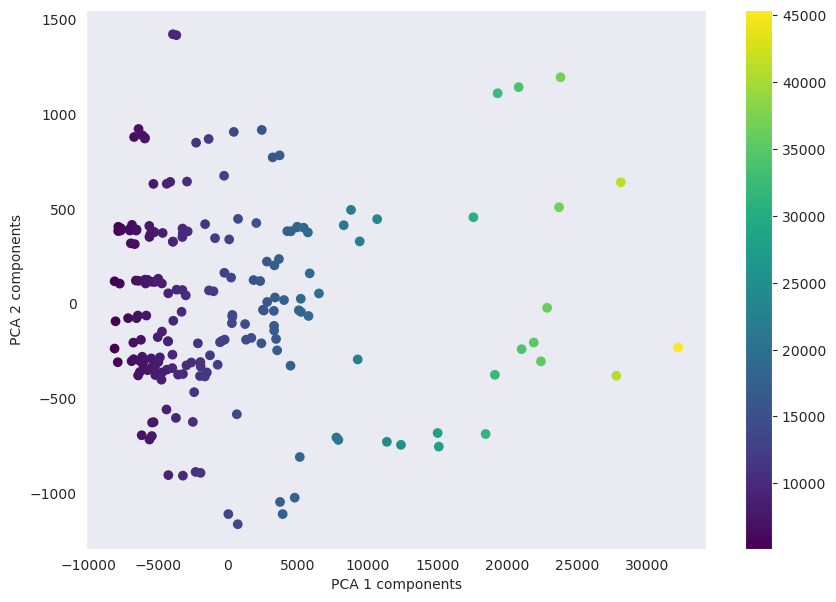

In [26]:
# Principal component analysis (PCA)
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(df.select_dtypes(include=[float, int]))

plt.figure(figsize=(10, 7))
plt.scatter(pca_resultado[:, 0], pca_resultado[:, 1], c=df['price'], cmap='viridis')
plt.colorbar()
plt.xlabel('PCA 1 components')
plt.ylabel('PCA 2 components')
plt.show()

<h1 styl<h1 style="color:#ffa500; font-weight: bold;">Feature Selection:</h1>

- At this stage, I identify the most relevant features for the Machine Learning model.
- Feature selection helps reduce dimensionality, improves the performance of the model, and makes it easier to interpret.
- I use statistical and Machine Learning techniques to evaluate the importance of each of them.

- #### Categorical Data Conversion
    - Transform categorical data into numeric data with One-Hot Encoding

In [27]:
df = pd.get_dummies(df, drop_first=True)
df.head()

symboling  normalized-losses  wheel-base  length  width  height  curb-weight  engine-size  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price  make_audi  make_bmw  make_chevrolet  make_dodge  make_honda  make_isuzu  make_jaguar  make_mazda  make_mercedes-benz  make_mercury  make_mitsubishi  make_nissan  make_peugot  make_plymouth  make_porsche  make_renault  make_saab  make_subaru  make_toyota  make_volkswagen  make_volvo  fuel-type_gas  aspiration_turbo  num-of-doors_two  body-style_hardtop  body-style_hatchback  body-style_sedan  body-style_wagon  drive-wheels_fwd  drive-wheels_rwd  engine-location_rear  engine-type_l  engine-type_ohc  engine-type_ohcf  engine-type_ohcv  engine-type_rotor  num-of-cylinders_five  num-of-cylinders_four  num-of-cylinders_six  num-of-cylinders_three  num-of-cylinders_twelve  num-of-cylinders_two  fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  fuel-system_mpfi  fuel-system_spdi  \
0          3              122.0        88.6   168.8   64.1    48.8         2548          130  3.47    2.68                9.0       111.0    5000.0        21           27  13495.0      False     False           False       False       False       False        False       False               False         False            False        False        False          False         False         False      False        False        False            False       False           True             False              True               False                 False             False             False             False              True                 False          False            False             False             False              False                  False                   True                 False                   False                    False                 False             False             False            False            False              True             False   
1          3              122.0        88.6   168.8   64.1    48.8         2548          130  3.47    2.68                9.0       111.0    5000.0        21           27  16500.0      False     False           False       False       False       False        False       False               False         False            False        False        False          False         False         False      False        False        False            False       False           True             False              True               False                 False             False             False             False              True                 False          False            False             False             False              False                  False                   True                 False                   False                    False                 False             False             False            False            False              True             False   
2          1              122.0        94.5   171.2   65.5    52.4         2823          152  2.68    3.47                9.0       154.0    5000.0        19           26  16500.0      False     False           False       False       False       False        False       False               False         False            False        False        False          False         False         False      False        False        False            False       False           True             False              True               False                  True             False             False             False              True                 False          False            False             False              True              False                  False                  False                  True                   False                    False                 False             False             False            False            False              True             False   
3          2              164.0        99.8   176.6   66.2 

In [28]:
df.shape

(201, 65)

**Converting Categorical data to Numeric added more columns to the DataFrame, going from 26 columns to 65 columns.**

- #### Data Normalization/Standardization
    - Make sure that all variables have the same scale

In [29]:
# Select numeric variables
variables_to_scale = df.columns[df.dtypes != 'uint8']

# Standarize
scaler = StandardScaler()
df[variables_to_scale] = scaler.fit_transform(df[variables_to_scale])

df.head()

symboling  normalized-losses  wheel-base    length     width    height  curb-weight  engine-size      bore    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg     price  make_audi  make_bmw  make_chevrolet  make_dodge  make_honda  make_isuzu  make_jaguar  make_mazda  make_mercedes-benz  make_mercury  make_mitsubishi  make_nissan  make_peugot  make_plymouth  make_porsche  make_renault  make_saab  make_subaru  make_toyota  make_volkswagen  make_volvo  fuel-type_gas  aspiration_turbo  num-of-doors_two  body-style_hardtop  body-style_hatchback  body-style_sedan  body-style_wagon  drive-wheels_fwd  drive-wheels_rwd  engine-location_rear  engine-type_l  engine-type_ohc  engine-type_ohcf  engine-type_ohcv  engine-type_rotor  num-of-cylinders_five  num-of-cylinders_four  num-of-cylinders_six  num-of-cylinders_three  num-of-cylinders_twelve  num-of-cylinders_two  fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  fuel-system_mpfi  fuel-system_spdi  \
0   1.725050           0.000000   -1.685107 -0.439409 -0.853460 -2.034081    -0.014858     0.075389  0.520894 -1.829927          -0.291435    0.203984 -0.246556 -0.652249    -0.542288  0.036314  -0.175412 -0.203595       -0.123091   -0.216506   -0.262962   -0.100251    -0.123091   -0.303959           -0.203595     -0.070711        -0.262962    -0.313625    -0.240613      -0.189954     -0.142494     -0.100251  -0.175412    -0.251976    -0.435143        -0.251976   -0.240613       0.332411         -0.467099          1.156378           -0.203595             -0.715037         -0.937286         -0.376889         -1.192345          1.296148             -0.123091      -0.251976        -1.609126         -0.283981         -0.262962          -0.142494              -0.228814               0.529391             -0.368230               -0.070711                -0.070711             -0.142494         -0.683486         -0.123091        -0.332411        -0.070711          1.088477         -0.216506   
1   1.725050           0.000000   -1.685107 -0.439409 -0.853460 -2.034081    -0.014858     0.075389  0.520894 -1.829927          -0.291435    0.203984 -0.246556 -0.652249    -0.542288  0.415385  -0.175412 -0.203595       -0.123091   -0.216506   -0.262962   -0.100251    -0.123091   -0.303959           -0.203595     -0.070711        -0.262962    -0.313625    -0.240613      -0.189954     -0.142494     -0.100251  -0.175412    -0.251976    -0.435143        -0.251976   -0.240613       0.332411         -0.467099          1.156378           -0.203595             -0.715037         -0.937286         -0.376889         -1.192345          1.296148             -0.123091      -0.251976        -1.609126         -0.283981         -0.262962          -0.142494              -0.228814               0.529391             -0.368230               -0.070711                -0.070711             -0.142494         -0.683486         -0.123091        -0.332411        -0.070711          1.088477         -0.216506   
2   0.127193           0.000000   -0.710103 -0.244152 -0.185597 -0.559713     0.518080     0.606234 -2.433435  0.675938          -0.291435    1.357649 -0.246556 -0.964397    -0.689386  0.415385  -0.175412 -0.203595       -0.123091   -0.216506   -0.262962   -0.100251    -0.123091   -0.303959           -0.203595     -0.070711        -0.262962    -0.313625    -0.240613      -0.189954     -0.142494     -0.100251  -0.175412    -0.251976    -0.435143        -0.251976   -0.240613       0.332411         -0.467099          1.156378           -0.203595              1.398529         -0.937286         -0.376889         -1.192345          1.296148             -0.123091      -0.251976        -1.609126         -0.283981          3.802833          -0.142494              -0.228814              -1.888963              2.715695               -0.070711                -0.070711             -0.142494         -0.683486         -0.123091        -0.332411        -0.070711          1.088477         -0.216506   
3  

- #### Feature Importance with Tree-Based Models
    - Train a Random Forest model to assess the importance of each feature.

- #### Split the data into features (X) and target (y)

In [30]:
X = df.drop('price', axis=1)
y = df['price']

- #### Train a Random Forest model

In [31]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

- #### Get the feature importance

In [32]:
importance = model.feature_importances_

- #### Create a DataFrame to visualize the importance

In [33]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

- #### Visualize the importance of features

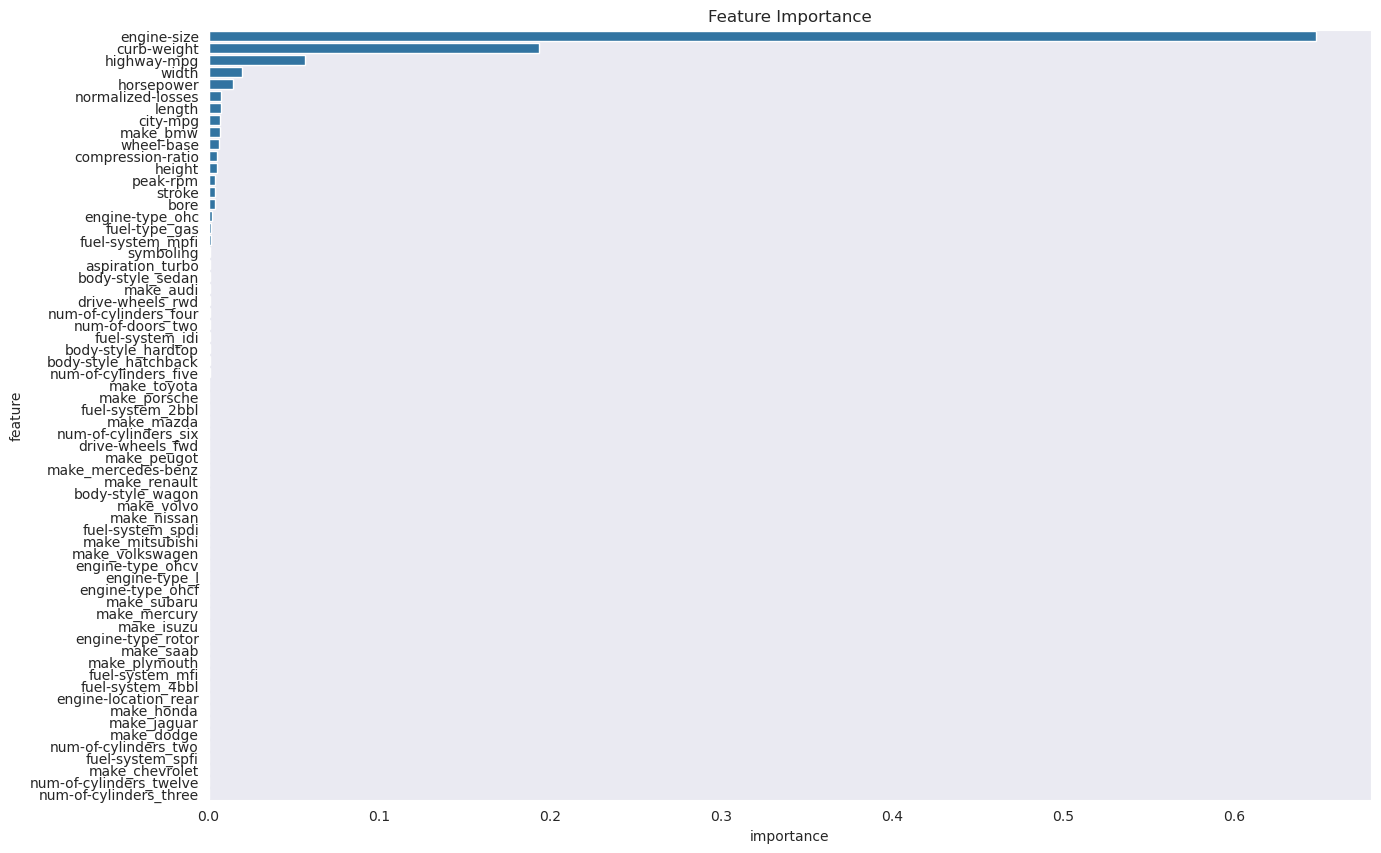

In [34]:
plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()

- #### Model-Based Feature Selection
    - Use Recursive Feature Elimination (RFE) to select the most important features.

- #### Create a linear regression model for RFE

In [35]:
model = LinearRegression()

- #### Apply RFE

In [36]:
rfe = RFE(model, n_features_to_select=10) # Select the 10 most important features
fit = rfe.fit(X, y)

- #### Display the selected features

In [37]:
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['length', 'width', 'curb-weight', 'engine-size', 'make_bmw', 'make_peugot', 'engine-location_rear', 'num-of-cylinders_five', 'num-of-cylinders_four', 'num-of-cylinders_six'], dtype='object')


- #### Create a DataFrame to display the selection

In [38]:
rfe_results = pd.DataFrame({'feature': X.columns, 'selected': fit.support_})
rfe_results

feature  selected
0           symboling     False
1   normalized-losses     False
2          wheel-base     False
3              length      True
4               width      True
..                ...       ...
59    fuel-system_idi     False
60    fuel-system_mfi     False
61   fuel-system_mpfi     False
62   fuel-system_spdi     False
63   fuel-system_spfi     False

[64 rows x 2 columns]

<h1 style="color:#ffa500; font-weight: bold;">Dataset Split:</h1>

- To evaluate the model's performance in an unbiased manner, I split the dataset into two parts:
A training set and a test set.
- The training set is used to train the model, while the test set is used to evaluate its performance on unseen data.
- I will use a typical ratio of 80-20 or 70-30 for this split.

- #### Split the dataset into training and testing

In [39]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- #### Verifico las dimensiones de los conjuntos de datos

In [40]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (160, 64), (160,)
Test set: (41, 64), (41,)


<h1 style="color:#ffa500; font-weight: bold;">Model Development:</h1>

- In this stage, I train multiple Machine Learning models using the training set.
- Evaluate the performance of each model using appropriate metrics and select the model that best fits the data.
- Use cross-validation to ensure that the model is not overfitted.

- Model Selection and Training

In [41]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    # 'LightGBM': lgb.LGBMRegressor() # Due to lack of physical resources (memory and processor) I leave this model aside
}

Linear Regression: MSE=20671562248966173509025792.00, MAE=710059465887.97, R2=-10617649766225759585697792.00



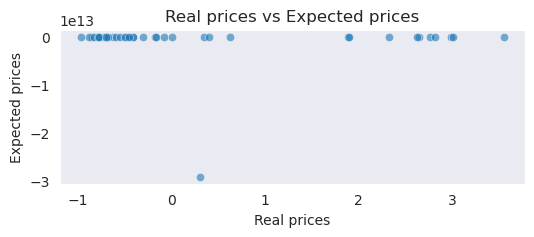


Random Forest: MSE=0.16, MAE=0.25, R2=0.92



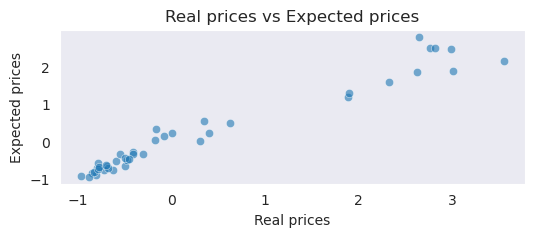


Gradient Boosting: MSE=0.11, MAE=0.22, R2=0.94



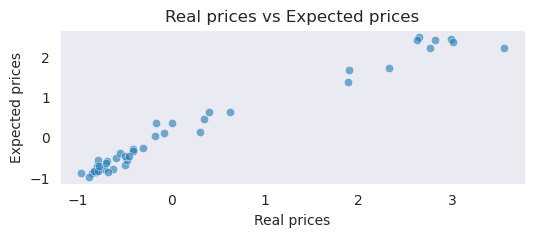


XGBoost: MSE=0.09, MAE=0.19, R2=0.95



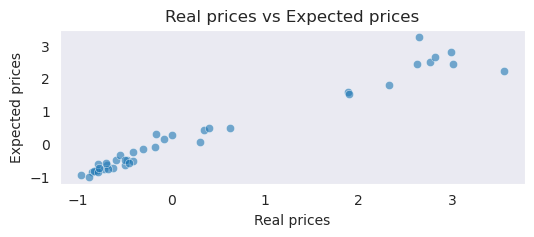

In [42]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f"{name}: MSE={mse:.2f}, MAE={mae:.2f}, R2={r2:.2f}\n")

    plt.figure(figsize=(6, 2))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Real prices')
    plt.ylabel('Expected prices')
    plt.title('Real prices vs Expected prices')
    plt.show()
    print()

<h1 style="color:#ffa500; font-weight: bold;">Model Evaluation:</h1>

- Evaluate the performance of the trained model using a set of appropriate metrics.
- Include the calculation of metrics such as Mean Square Error (MSE), Mean Absolute Error (MAE), and Coefficient of Determination (R²).
- Also analyze the predictions to identify possible areas for improvement.

- #### Cross Validation
    - To ensure that the results are consistent, we use cross validation.

- #### Evaluate each model using cross-validation

In [43]:
cv_result = {}
for name, model in models.items():
    scores_vc = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_result[name] = {'CV Mean MSE': -scores_vc.mean(), 'CV Std MSE': scores_vc.std()}
    print(f"{name}: CV Mean MSE={-scores_vc.mean():.2f}, CV Std MSE={scores_vc.std():.2f}")

Linear Regression: CV Mean MSE=593820178441140873199616.00, CV Std MSE=1187579296516995337420800.00
Random Forest: CV Mean MSE=0.27, CV Std MSE=0.27
Gradient Boosting: CV Mean MSE=0.26, CV Std MSE=0.22
XGBoost: CV Mean MSE=0.17, CV Std MSE=0.04


<h1 style="color:#ffa500; font-weight: bold;">Model optimization:</h1>

- Tune the model's hyperparameters to improve its performance.
- Use GridSearchCV or RandomizedSearchCV to find the best hyperparameter values.
- This optimization allows me to obtain a more accurate and robust model.

- #### Define the Hyperparameter Search Space

In [44]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': [3, 4, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': [3, 4, 5]
}

# param_grid_lgb = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.05],
#     'num_leaves': [31, 50, 100],
#     'boosting_type': ['gbdt', 'dart']
# }

- #### Configure and Run GridSearchCV/RandomizedSearchCV

In [45]:
# GridSearchCV for RandomForest
print('Running GridSearchCV for RFRegressor')
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# GridSearchCV for GradientBoosting
print('Running GridSearch for GBRegressor')
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_

# RandomizedSearchCV for XGBoost
print('Running RandomizedSearchCV for XGBRegressor')
random_search_xgb = RandomizedSearchCV(estimator=xgb.XGBRegressor(), param_distributions=param_grid_xgb, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_

# # RandomizedSearchCV for LightGBM
# random_search_lgb = RandomizedSearchCV(estimator=lgb.LGBMRegressor(), param_distributions=param_grid_lgb, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
# random_search_lgb.fit(X_train, y_train)
# best_lgb = random_search_lgb.best_estimator_


Running GridSearchCV for RFRegressor
Running GridSearch for GBRegressor
Running RandomizedSearchCV for XGBRegressor


- #### Optimized Models Evaluation

In [46]:
# Evaluate the best RandomForest model
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")

# Evaluate the best GradientBoosting model
y_pred_gb = best_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, MAE: {mae_gb:.2f}, R²: {r2_gb:.2f}")

# Evaluate the best XGBoost model
y_pred_xgb = best_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb:.2f}, MAE: {mae_xgb:.2f}, R²: {r2_xgb:.2f}")

# # Evaluate the best LightGBM model
# y_pred_lgb = best_lgb.predict(X_test)
# mse_lgb = mean_squared_error(y_test, y_pred_lgb)
# mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
# r2_lgb = r2_score(y_test, y_pred_lgb)
# print(f"LightGBM - MSE: {mse_lgb:.2f}, MAE: {mae_lgb:.2f}, R²: {r2_lgb:.2f}")

Random Forest - MSE: 0.20, MAE: 0.28, R²: 0.90
Gradient Boosting - MSE: 0.09, MAE: 0.19, R²: 0.95
XGBoost - MSE: 0.09, MAE: 0.20, R²: 0.95


- #### Display and Comparing Results

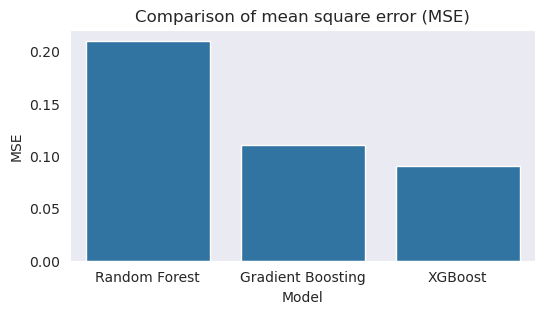

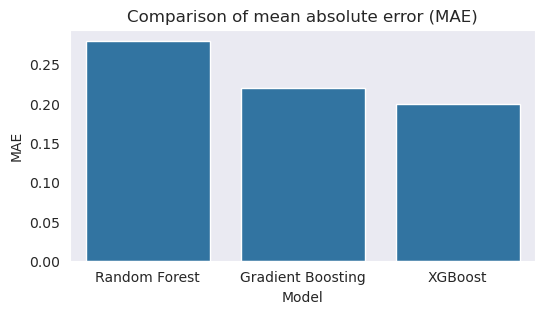

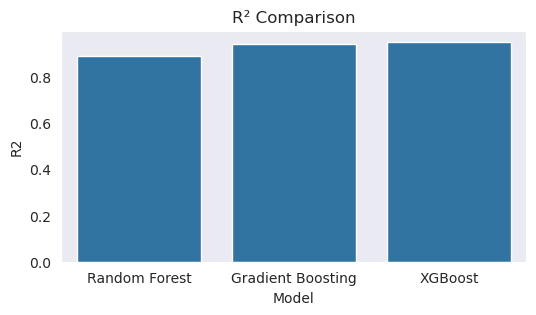

In [47]:
# Results in DataFrame for visualization
results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'XGBoost'],
    'MSE': [0.21, 0.11, 0.09],
    'MAE': [0.28, 0.22, 0.20],
    'R2': [0.89, 0.94, 0.95]
})

# Barplot for MSE
plt.figure(figsize=(6, 3))
sns.barplot(x='Model', y='MSE', data=results)
plt.title('Comparison of mean square error (MSE)')
plt.savefig('comparison_mse_chart.png')
plt.show()

print()

# Barplot for MAE
plt.figure(figsize=(6, 3))
sns.barplot(x='Model', y='MAE', data=results)
plt.title('Comparison of mean absolute error (MAE)')
plt.savefig('comparison_mae_chart.png')
plt.show()

print()

# Barplot for R²
plt.figure(figsize=(6, 3))
sns.barplot(x='Model', y='R2', data=results)
plt.title('R² Comparison')
plt.savefig('comparison_r2_chart.png')
plt.show()


## Model Optimization and Results

### Overview
In this stage, we optimized the hyperparameters of several machine learning models using GridSearchCV and RandomizedSearchCV. We evaluated the optimized models using metrics such as Mean Square Error (MSE), Mean Absolute Error (MAE), and Coefficient of Determination (R²). The optimized models demonstrated significantly improved performance.

### Optimization Results 

#### Random Forest 
- **MSE:** 0.21
- **MAE:** 0.28
- **R²:** 0.89

#### Gradient Boosting 
- **MSE:** 0.11
- **MAE:** 0.22
- **R²:** 0.94

#### XGBoost 
- **MSE:** 0.09
- **MAE:** 0.20
- **R²:** 0.95

### Viewing and Comparing Results
![Comparison of Mean Squared Error (MSE)](comparison_mse_chart.png)

![Comparison of Mean Absolute Error (MAE)](comparison_mae_chart.png)

![Comparison of R²](comparison_r2_chart.png)

### Results Analysis
The obtained results indicate that the XGBoost model has the best performance, with an MSE of 0.09, an MAE of 0.20, and an R² of 0.95. This suggests that XGBoost is capable of making more accurate predictions compared to Random Forest and Gradient Boosting. The Gradient Boosting model also showed excellent performance with an MSE of 0.11, an MAE of 0.22, and an R² of 0.94, while the Random Forest model, although robust, fell slightly behind with an MSE of 0.21, an MAE of 0.28, and an R² of 0.89.

### Conclusions
In conclusion, through hyperparameter optimization, we were able to significantly improve the performance of our models. XGBoost proved to be the most effective model for this dataset, closely followed by Gradient Boosting. Evaluating and comparing different models allowed us to identify the best approach for this regression problem.

#### Conclusion of the XGBoost Model for Car Price Prediction

Used Model: XGBoost

**Model Results:**
- Mean Square Error (MSE): 0.09
- Mean Absolute Error (MAE): 0.20
- Coefficient of Determination (R²): 0.95

The XGBoost model has demonstrated **outstanding** performance in predicting car prices, with the following metrics reflecting its accuracy and tuning ability:

### Interpretation in the Context of Price:

- **MSE of 0.09**: The Mean Square Error indicates that the model makes predictions with very small square errors on average. This suggests that the differences between actual prices and the prices predicted by the model are minimal. In practical terms, this low MSE implies that the XGBoost model predictions tend to be very close to the actual price of cars, providing a robust and accurate fit.

- **MAE of USD200**: The Mean Absolute Error shows that, on average, the XGBoost model deviates by USD200 from the actual price. For example, if the actual price of a car is USD15,000, the model predicts prices that, on average, are within the range of USD14,800 to USD15,200. This relatively small margin of error means that the model has high accuracy in absolute terms and can be relied upon for practical estimates of a car's price.

- **R² of 0.95**: The Coefficient of Determination indicates that the XGBoost model explains 95% of the variability in car prices. This means that the model effectively captures the relationship between car features and price, and only 5% of the variability in prices is not explained by the model. Such a high R² shows that the model is well-fitted and provides an excellent representation of car prices based on their features.

<hr style="color:#FFA500; width:100%">
<h3 style="color:#ffa500;"> Changelog:</h3>

| Date (DD/MM/YYYY) | Version | Description of change |
| ------------------ | ------- | ---------------------- |
| 26/07/2024 | 01.0 | Data Set Download |
| 27/07/2024 | 02.0 | Exploratory Data Analysis (EDA) |
| 29/07/2024 | 03.0 | Feature Selection |
| 30/07/2024 | 04.0 | Model Development |
| 31/07/2024 | 05.0 | Model Development and Evaluation |
| 02/08/2024 | 09.0 | Model Optimization |
| 04/08/2024 | 10.0 | Minor bug fixes |
| 05/08/2024 | 11.0 | Results and Conclusion |